# Project FCD
#### This project aims to answer the questions that we proposed to the dataset that we choose.

### 1) Load that the "insurance.csv" dataset into a pandas dataframe, and take a look of the data
- import necessary libraries
- import dataset
- verify if there are missing values
- verify if there are outliers in the target variable `charges` (use a boxplot, and the interquartile method)
  - visualize the result using a histogram
- visualize the remaining variables using histograms in subplots

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pip install seaborn
import seaborn as sns

In [2]:
data = pd.read_csv('insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
print(data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [4]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


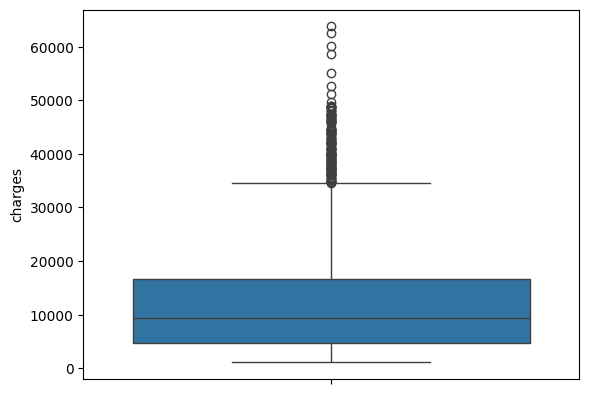

In [5]:
sns.boxplot(y='charges', data=data)
plt.show()

<Axes: xlabel='charges', ylabel='Count'>

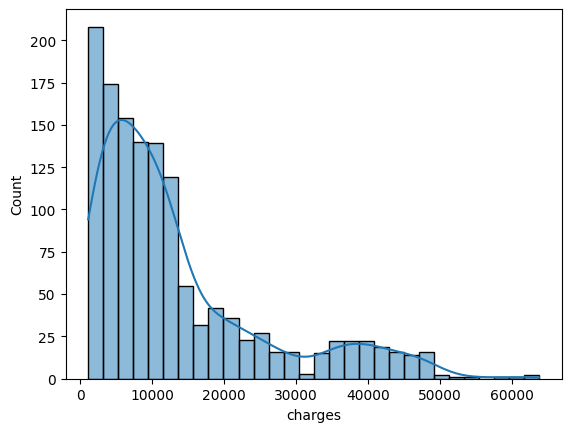

In [6]:
sns.histplot(data['charges'], kde=True, linewidth=1)

In [7]:
q1 = 4740.287
q3 = 16639.913
iqr = q3 - q1
len(data[data['charges'] > q3 + 1.5*iqr])

139

In [8]:
data =data[data['charges'] <= q3 + 1.5* iqr]
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


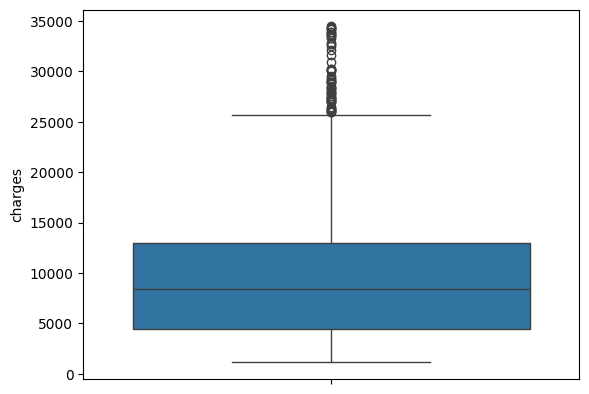

In [9]:
sns.boxplot(y='charges', data=data)

plt.show()

<Axes: xlabel='charges', ylabel='Count'>

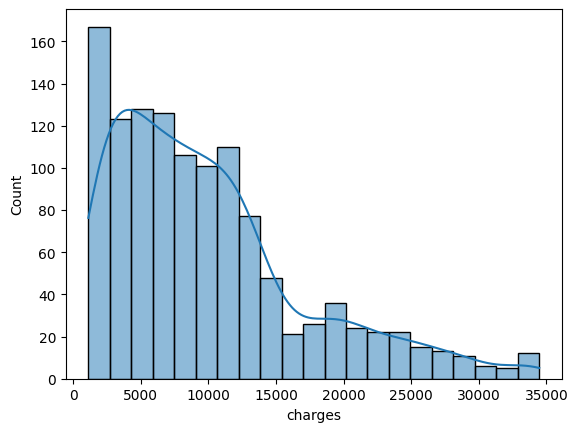

In [10]:
sns.histplot(data['charges'], kde=True, linewidth=1)

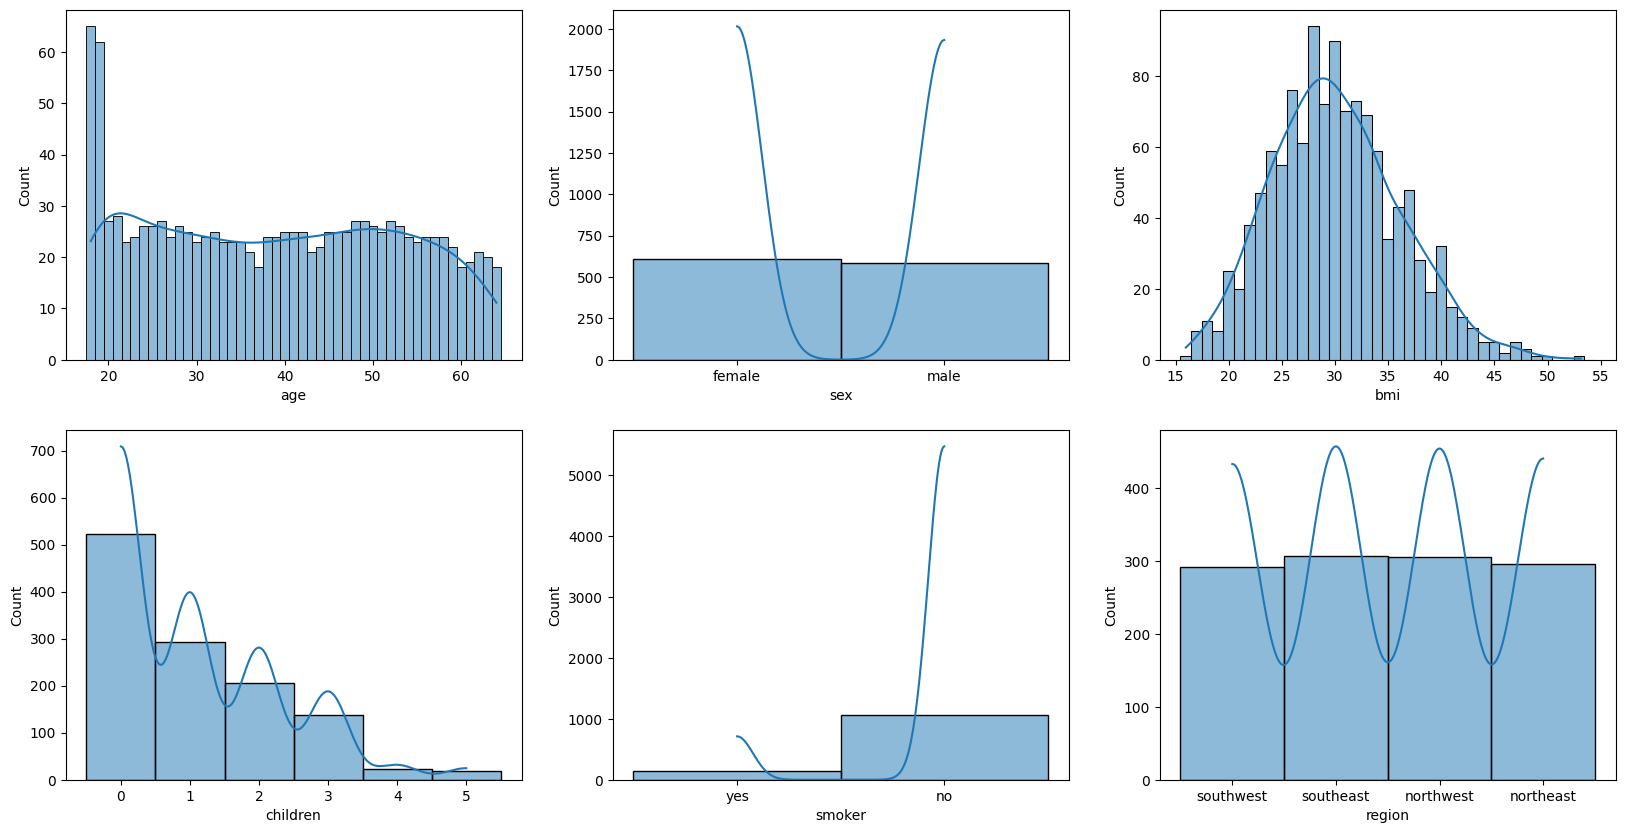

In [11]:
variables = data.drop(columns='charges').columns
plt.figure(figsize=(20,10))
aux = 1
for var in variables:
    plt.subplot(2, 3, aux)
    sns.histplot(data[var], discrete=True, kde=True)
    aux += 1

### 2) Transform the numerical variable `children` into a categorical one
- Use a function, and then `apply` it
     - if children = 0 -> no_children
     - if children = 1 -> unique_child
     - else -> 2_or_more
- Visualize the new variable using a histogram

[Text(0, 0, '43.54%'),
 Text(0, 0, '24.35%'),
 Text(0, 0, '17.18%'),
 Text(0, 0, '11.51%'),
 Text(0, 0, '1.92%'),
 Text(0, 0, '1.50%')]

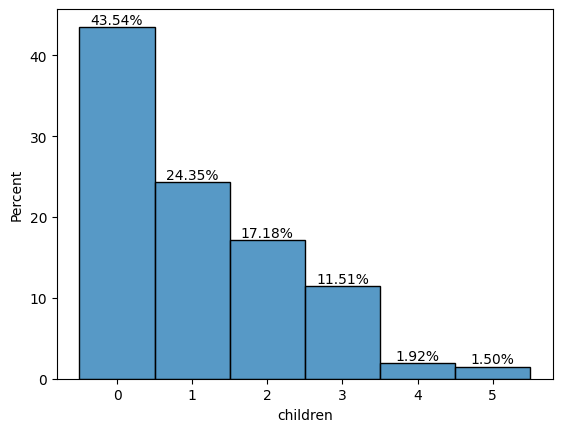

In [12]:
hist = sns.histplot(data['children'], discrete=True, kde=False, stat = 'percent')
hist.bar_label(hist.containers[0], fmt='%.2f%%')

In [13]:
def transform_children(num):
    if num == 0:
        return 'no_children'
    elif num == 1:
        return 'unique_children'
    else:
        return '2_or_more'

In [14]:
data['children_categories'] = data['children'].apply(transform_children)
data

C:\Users\migue\AppData\Local\Temp\ipykernel_33672\3031374880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['children_categories'] = data['children'].apply(transform_children)


,age,sex,bmi,children,smoker,region,charges,children_categories
0,19,female,27.900,0,yes,southwest,16884.92400,no_children
1,18,male,33.770,1,no,southeast,1725.55230,unique_children
2,28,male,33.000,3,no,southeast,4449.46200,2_or_more
3,33,male,22.705,0,no,northwest,21984.47061,no_children
4,32,male,28.880,0,no,northwest,3866.85520,no_children
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,2_or_more
1334,18,female,31.920,0,no,northeast,2205.98080,no_children
1335,18,female,36.850,0,no,southeast,1629.83350,no_children
1336,21,female,25.800,0,no,southwest,2007.94500,no_children


[Text(0, 0, '43.54%'), Text(0, 0, '24.35%'), Text(0, 0, '32.11%')]

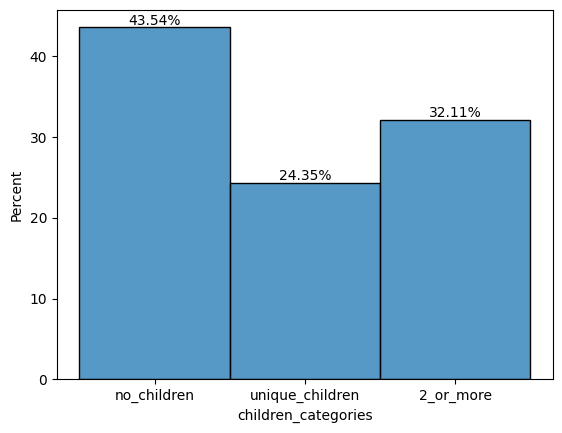

In [15]:
hist = sns.histplot(data['children_categories'], discrete=True, kde=False, stat = 'percent')
hist.bar_label(hist.containers[0], fmt='%.2f%%')

### 3) Data exploration using pairplots
- Create a pairplot per categorical variable (use the `hue` for that variable):
      - Visualize all the numerical variables depending on the categorical one
- Which conclusions can you extract from the data? 

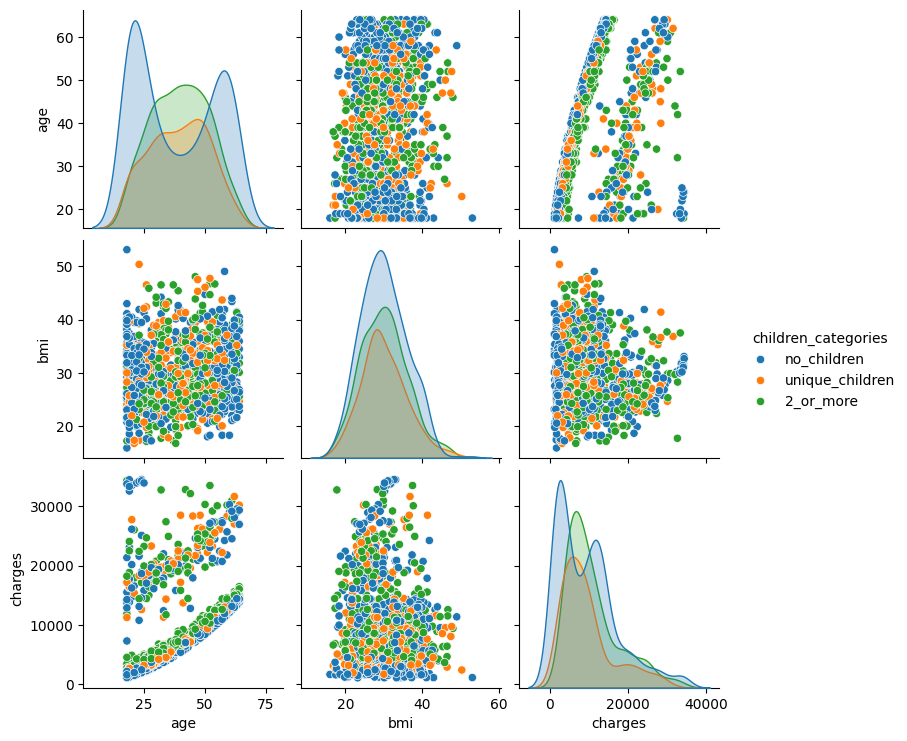

In [16]:
sns.pairplot(data, vars=['age', 'bmi', 'charges'], hue='children_categories',diag_kind='kde')

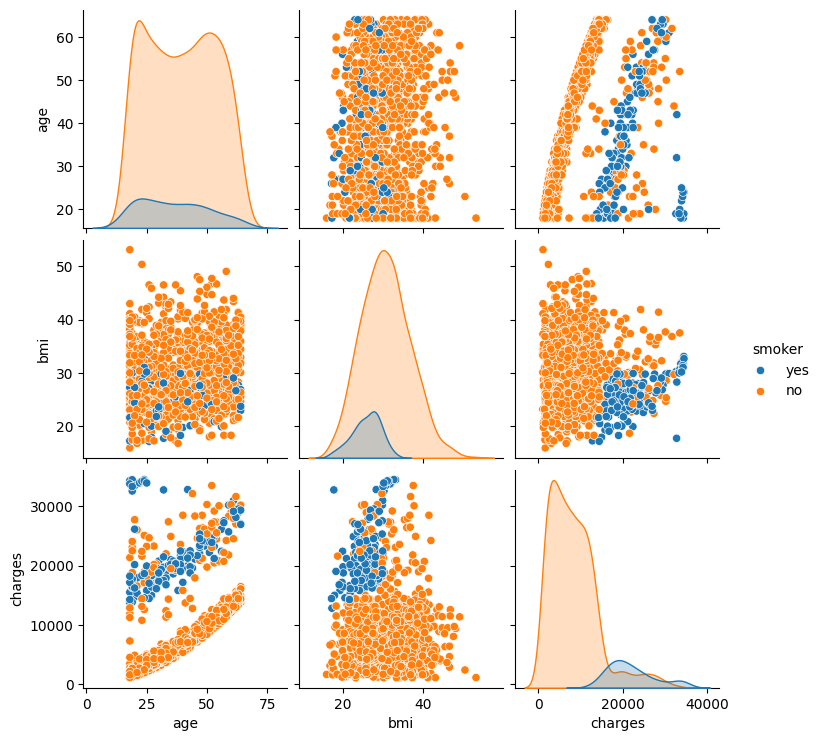

In [17]:
sns.pairplot(data, vars=['age', 'bmi', 'charges'], hue='smoker', diag_kind='kde')

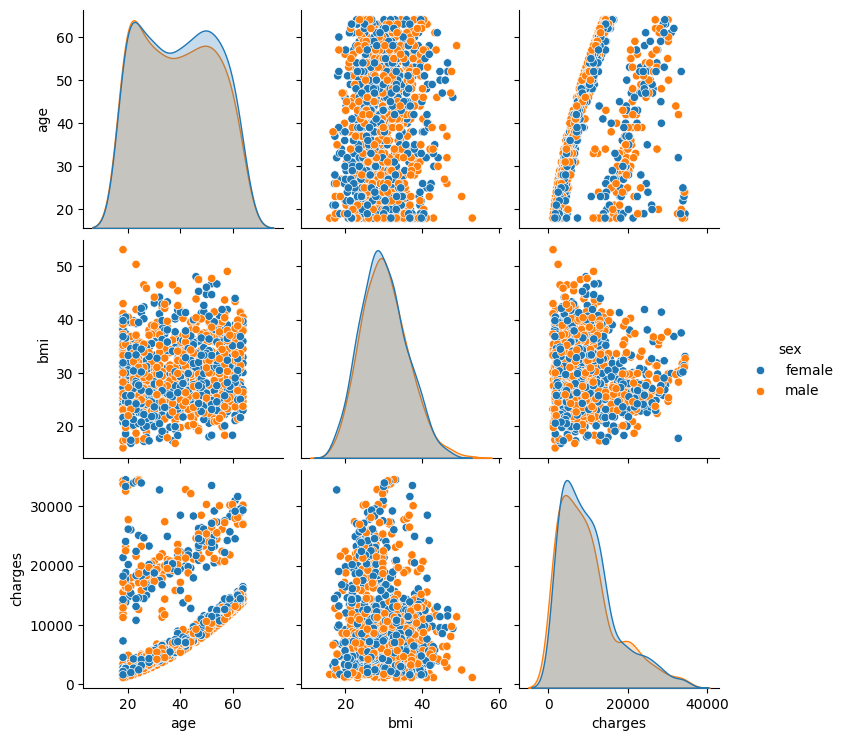

In [18]:
sns.pairplot(data, vars=['age', 'bmi', 'charges'], hue='sex',diag_kind='kde')

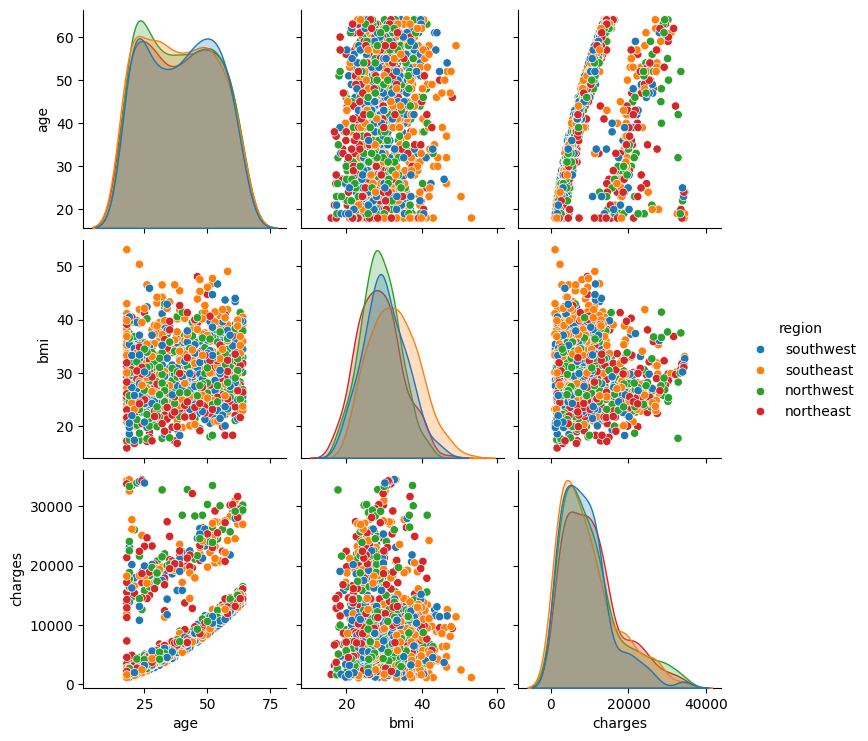

In [19]:
sns.pairplot(data, vars=['age', 'bmi', 'charges'], hue='region',diag_kind='kde')

### 4) Correlations
- Visualize the correlations between the numerical values
  - Addionally use a joinplot to visualize the two more correlated variables
- Transform the categorical variables in numerical ones using the LabelEncoder
    - `from sklearn.preprocessing import LabelEncoder`
    - `label_encoder = LabelEncoder()`
    - `data['sex_encoded'] = label_encoder.fit_transform(data['sex'])`
    - Create a unique visualization combining the more relevant variables
- Which conclusions can you extract from the data? 

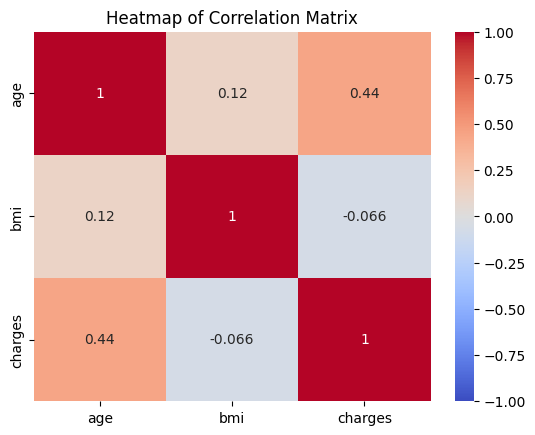

In [20]:
# Correlation matrix 
correlation_matrix = data[['age', 'bmi', 'charges']].corr()

# Heatmap of correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of Correlation Matrix')
plt.show()

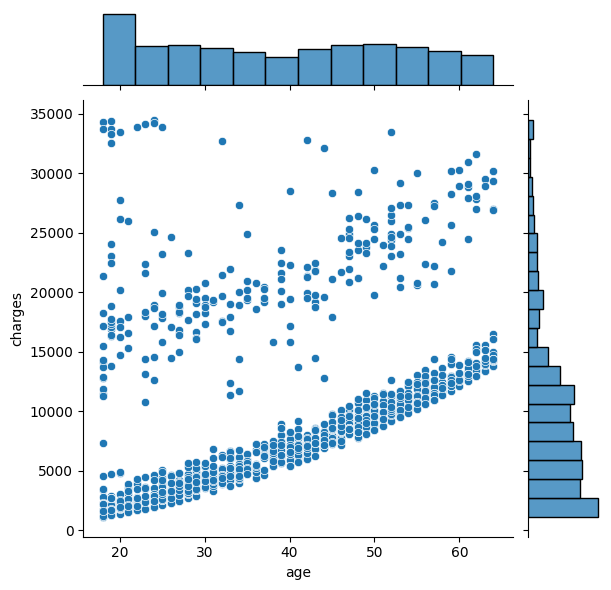

In [21]:
sns.jointplot(x="age", y="charges", data=data)

In [22]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['sex_encoded'] = label_encoder.fit_transform(data['sex'])
data['children_encoded'] = label_encoder.fit_transform(data['children_categories'])
data['smoker_encoded'] = label_encoder.fit_transform(data['smoker'])
data['region_encoded'] = label_encoder.fit_transform(data['region'])
data.head()

C:\Users\migue\AppData\Local\Temp\ipykernel_33672\763208311.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sex_encoded'] = label_encoder.fit_transform(data['sex'])
C:\Users\migue\AppData\Local\Temp\ipykernel_33672\763208311.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['children_encoded'] = label_encoder.fit_transform(data['children_categories'])
C:\Users\migue\AppData\Local\Temp\ipykernel_33672\763208311.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

,age,sex,bmi,children,smoker,region,charges,children_categories,sex_encoded,children_encoded,smoker_encoded,region_encoded
0,19,female,27.900,0,yes,southwest,16884.92400,no_children,0,1,1,3
1,18,male,33.770,1,no,southeast,1725.55230,unique_children,1,2,0,2
2,28,male,33.000,3,no,southeast,4449.46200,2_or_more,1,0,0,2
3,33,male,22.705,0,no,northwest,21984.47061,no_children,1,1,0,1
4,32,male,28.880,0,no,northwest,3866.85520,no_children,1,1,0,1


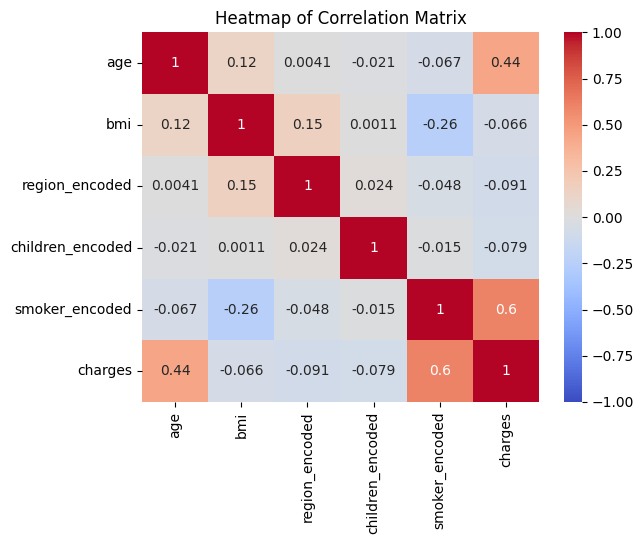

In [23]:
# Correlation matrix 
correlation_matrix = data[['age', 'bmi', 'region_encoded', 'children_encoded','smoker_encoded','charges']].corr()

# Heatmap of correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of Correlation Matrix')
plt.show()

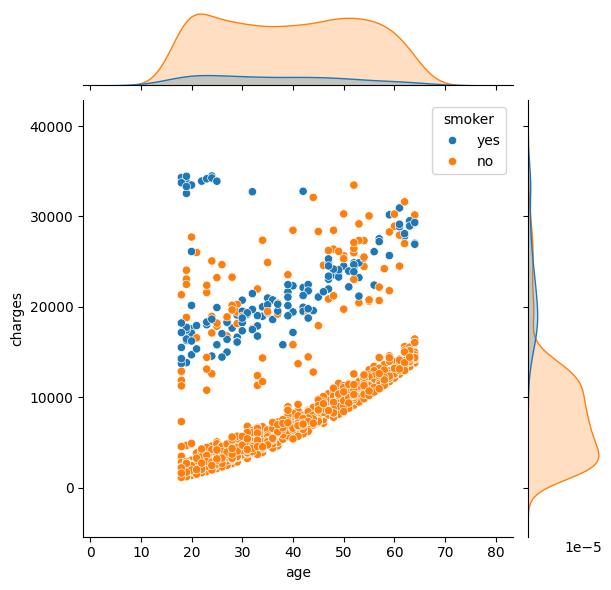

In [24]:
sns.jointplot(x="age", y="charges", data=data, hue='smoker')

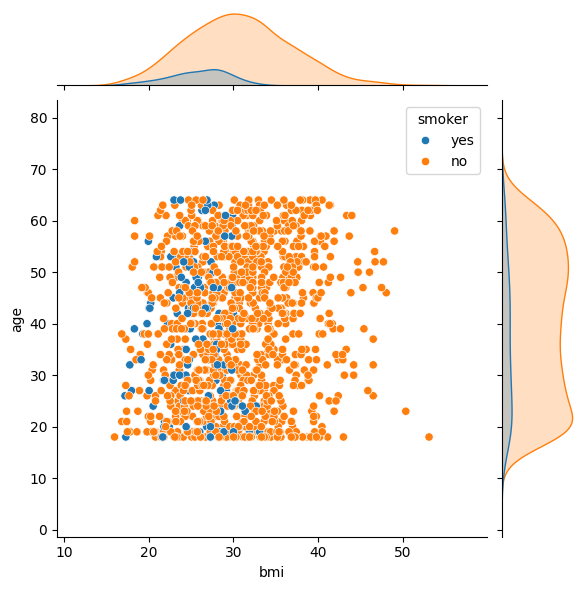

In [25]:
sns.jointplot(x="bmi", y="age", data=data, hue='smoker')

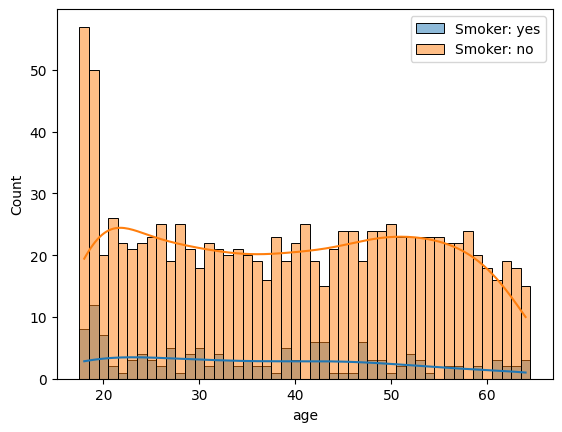

In [26]:
for category in data['smoker'].unique():
    subset = data[data['smoker'] == category]
    sns.histplot(subset['age'], kde = True, discrete=True, alpha =0.5, label=f"Smoker: {category}")

plt.legend()

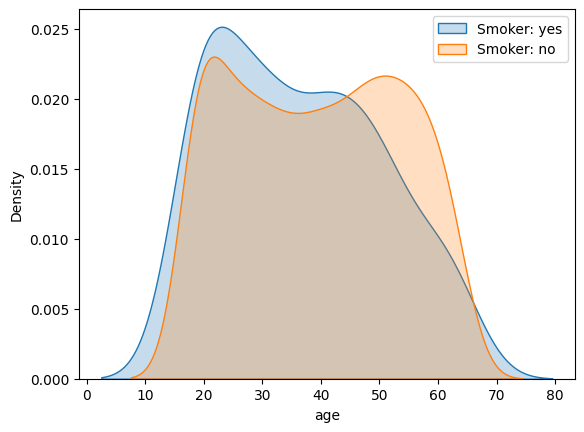

In [27]:
for category in data['smoker'].unique():
    subset = data[data['smoker'] == category]
    sns.kdeplot(subset['age'], fill=True,label=f"Smoker: {category}")

plt.legend()

### 5) Modeling (Regression)
- Divide the dataset using `train_test_split` into 80% train and 20% test
- Model a linear regression (use only the most important features, as seen in the visualizations)
   - Plot the actual vs predicted values
- Model a decision tree (use all the features)
  - Define a max_depth
  - Visualize the tree
- Evaluate both models, using R2 and MSE

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[['smoker_encoded','age','sex_encoded']], data[['charges']], test_size=0.2, random_state=42)

print(len(X_train))
print(len(X_test))

959
240


In [29]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [30]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 28155471.33726028
R-squared (R2): 0.5486479952447458


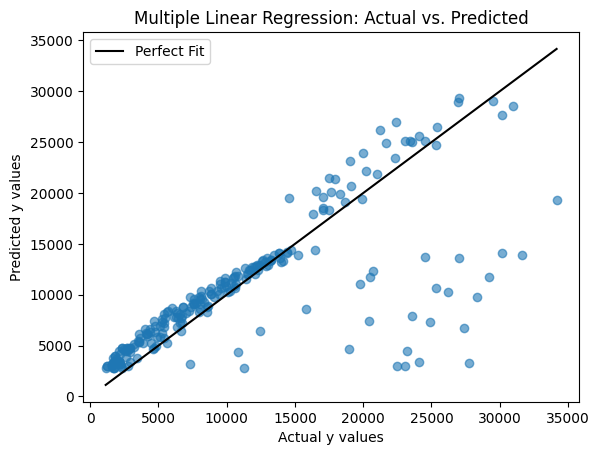

In [31]:
plt.scatter(y_test, y_pred, alpha=0.6)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='k', label="Perfect Fit")
plt.xlabel("Actual y values")
plt.ylabel("Predicted y values")
plt.title("Multiple Linear Regression: Actual vs. Predicted")
plt.legend()
plt.show()

In [32]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [33]:
data.head()

,age,sex,bmi,children,smoker,region,charges,children_categories,sex_encoded,children_encoded,smoker_encoded,region_encoded
0,19,female,27.900,0,yes,southwest,16884.92400,no_children,0,1,1,3
1,18,male,33.770,1,no,southeast,1725.55230,unique_children,1,2,0,2
2,28,male,33.000,3,no,southeast,4449.46200,2_or_more,1,0,0,2
3,33,male,22.705,0,no,northwest,21984.47061,no_children,1,1,0,1
4,32,male,28.880,0,no,northwest,3866.85520,no_children,1,1,0,1


In [34]:
X_train, X_test, y_train, y_test = train_test_split(data[['age','bmi','sex_encoded','children_encoded','smoker_encoded','region_encoded']], data[['charges']], test_size=0.2, random_state=42)

print(len(X_train))
print(len(X_test))

959
240


In [35]:
tree = DecisionTreeRegressor(max_depth = 3)

# Train (fit) the model on the training data
tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree.predict(X_test)

In [36]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 28443971.52027705
R-squared (R2): 0.5440231344346711


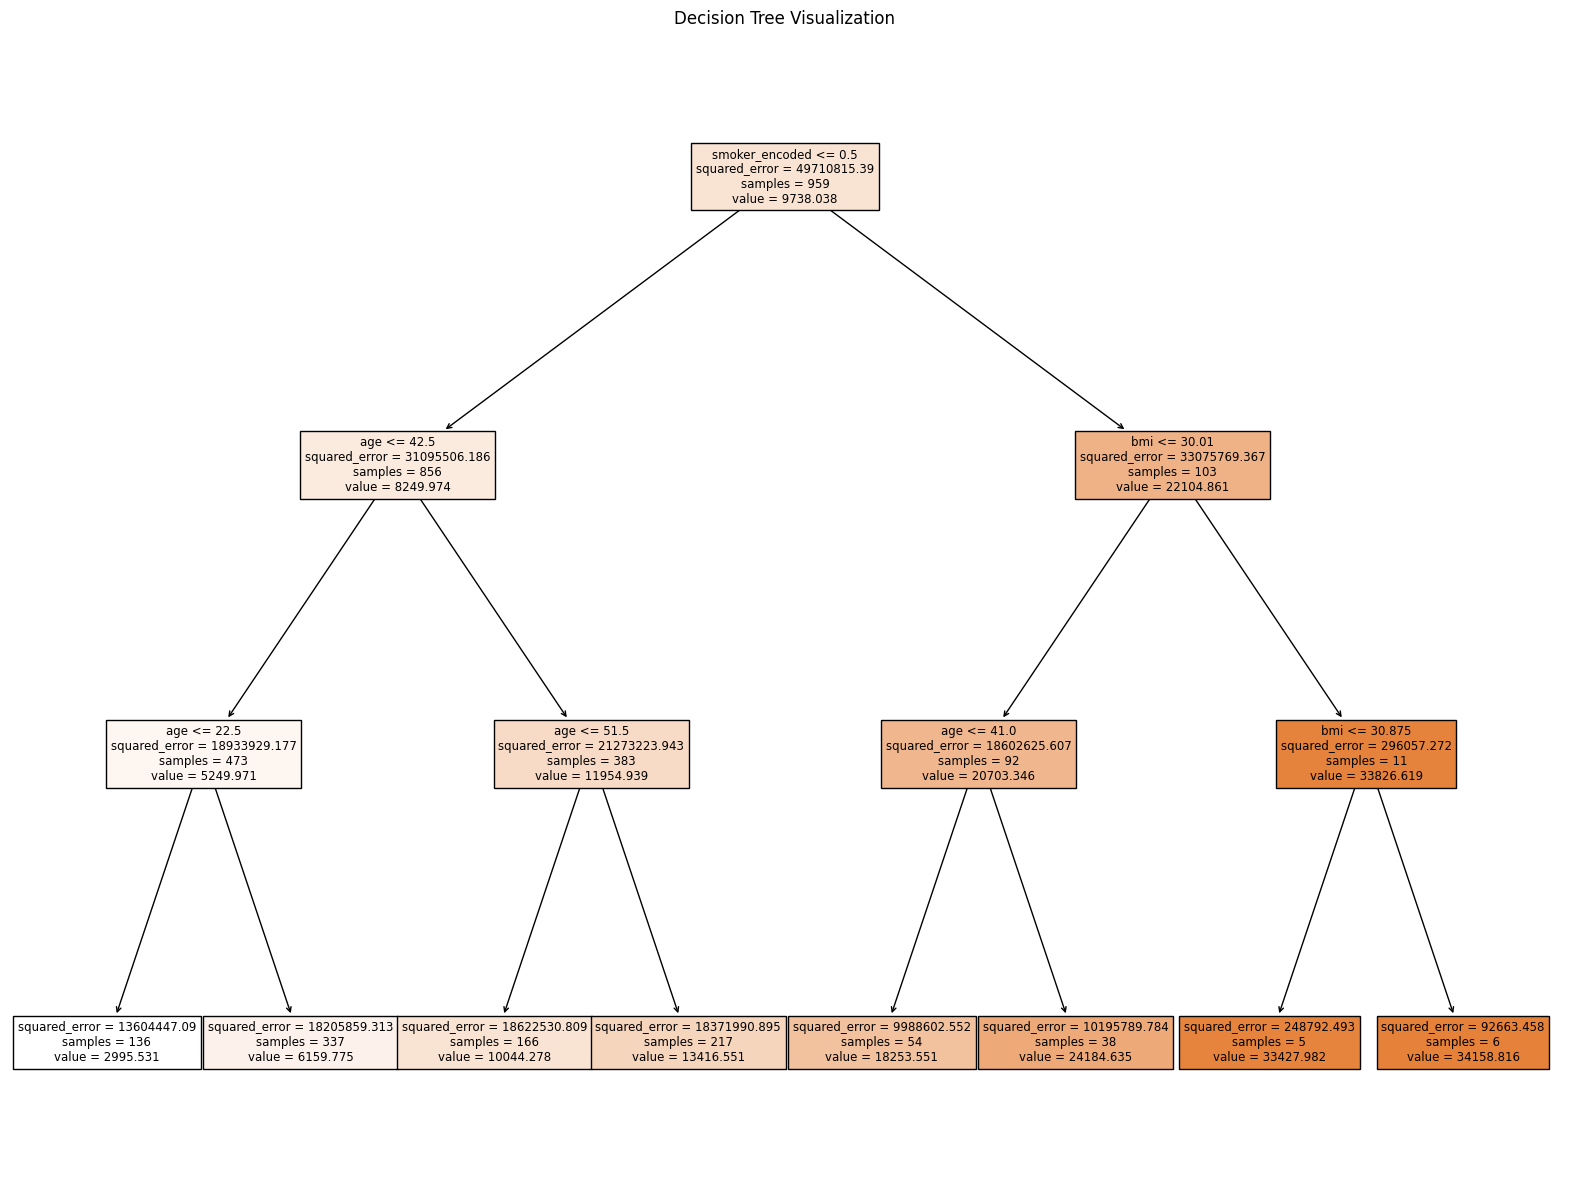

In [37]:
# Visualize the decision tree
plt.figure(figsize=(20, 15))
plot_tree(tree, filled=True, feature_names=['age','bmi','sex_encoded','children_encoded','smoker_encoded','region_encoded'])
plt.title("Decision Tree Visualization")
plt.show()

### 6) Transform the target variable from numerical to a categorical one
- Choose a value to divide the variable into two classes, select a value that creates a balance variable
- Visualize the distribution of the new variable in the two most important features (create a separate visualization to each)

<Axes: xlabel='charges', ylabel='Count'>

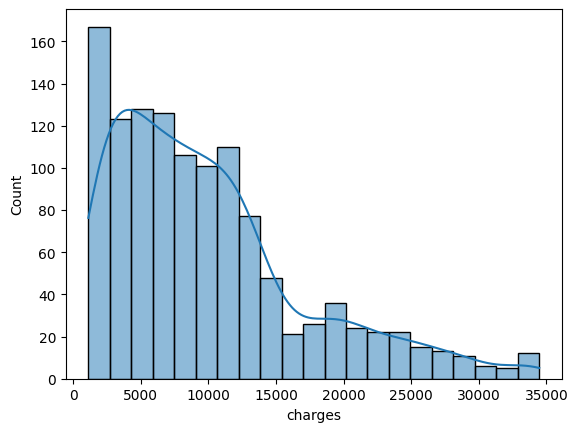

In [38]:
sns.histplot(data['charges'], kde=True, linewidth=1)

In [39]:
def charge_cat(charge):
    if charge < 8500:
        return 'low'
    elif charge >= 8500:
        return 'high'

data['charges_categories'] = data['charges'].apply(charge_cat)
data.head()

C:\Users\migue\AppData\Local\Temp\ipykernel_33672\3991330764.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['charges_categories'] = data['charges'].apply(charge_cat)


,age,sex,bmi,children,smoker,region,charges,children_categories,sex_encoded,children_encoded,smoker_encoded,region_encoded,charges_categories
0,19,female,27.900,0,yes,southwest,16884.92400,no_children,0,1,1,3,high
1,18,male,33.770,1,no,southeast,1725.55230,unique_children,1,2,0,2,low
2,28,male,33.000,3,no,southeast,4449.46200,2_or_more,1,0,0,2,low
3,33,male,22.705,0,no,northwest,21984.47061,no_children,1,1,0,1,high
4,32,male,28.880,0,no,northwest,3866.85520,no_children,1,1,0,1,low


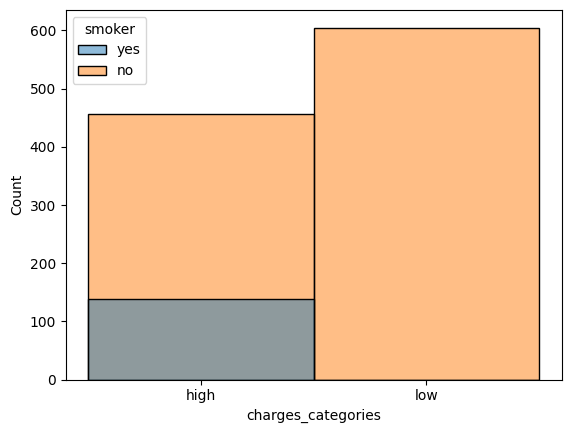

In [40]:
hist = sns.histplot(data=data, x ='charges_categories', discrete=True, kde=False, hue='smoker')
#hist.bar_label(hist.containers[0], fmt='%.2f%%')

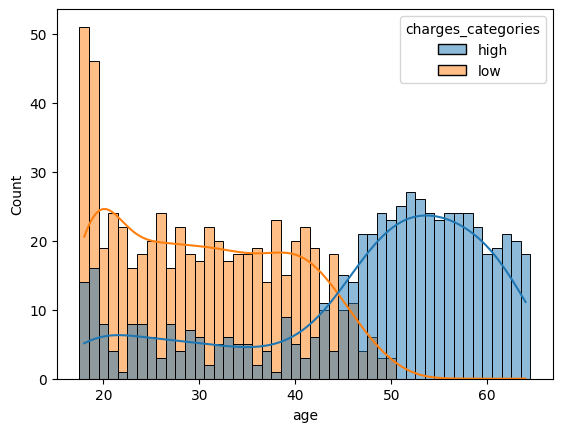

In [41]:
hist = sns.histplot(data=data, x ='age', discrete=True, kde=True, hue='charges_categories')

### 7) Modeling (Classification)
- Divide the dataset using `train_test_split` into 80% train and 20% test
- Create three models using the following algorithms:
   - Logistic Regression
   - Decision Tree
         - Visualize the tree
   - Random Forest
- Evaluate the models using accuracy and confusion matrixes

In [42]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

In [43]:
X_train, X_test, y_train, y_test = train_test_split(data[['age','bmi','sex_encoded','children_encoded','smoker_encoded','region_encoded']], data[['charges_categories']], test_size=0.2, random_state=42)
print(len(X_train))
print(len(X_test))

959
240


Accuracy: 0.88


c:\Users\migue\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


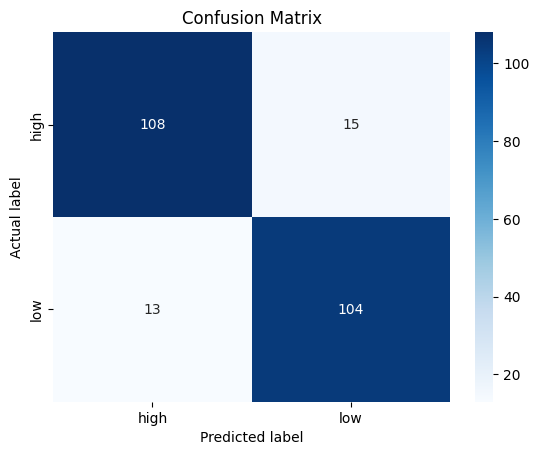

In [44]:
model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

cm_lr = confusion_matrix(y_test, y_pred)
categories = np.unique( data[['charges_categories']])
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

Accuracy: 0.91


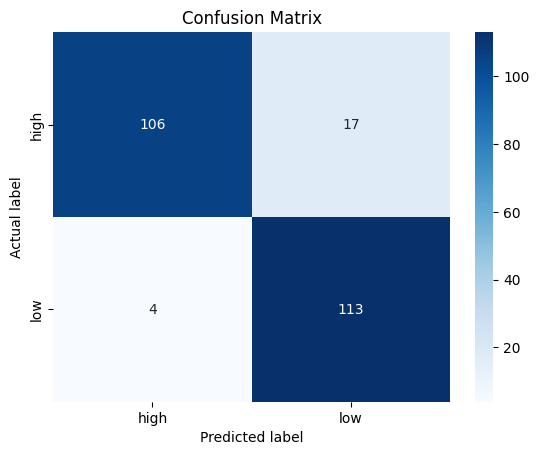

In [45]:
model = DecisionTreeClassifier(max_depth = 3)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

cm_tree = confusion_matrix(y_test, y_pred)
categories = np.unique( data[['charges_categories']])
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

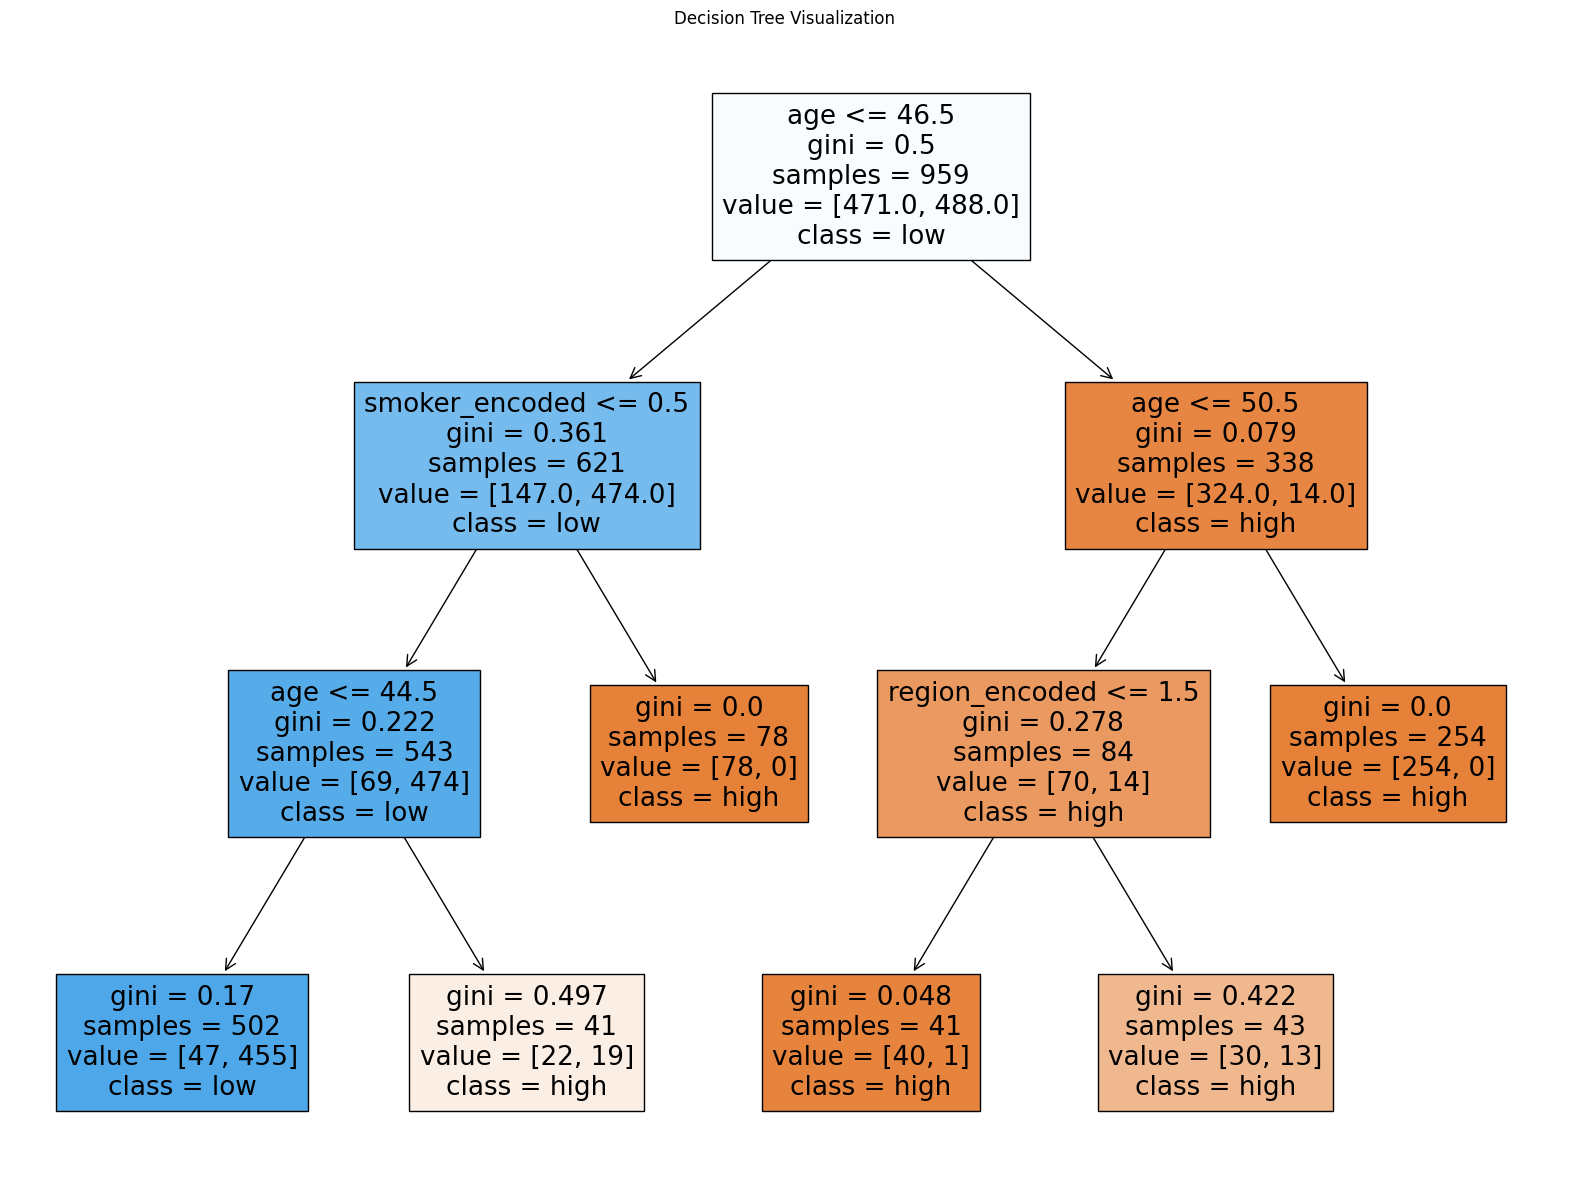

In [46]:
plt.figure(figsize=(20, 15))
plot_tree(model, filled=True, feature_names=data[['age','bmi','sex_encoded','children_encoded','smoker_encoded','region_encoded']].columns, class_names=categories)
plt.title("Decision Tree Visualization")
plt.show()

c:\Users\migue\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.91


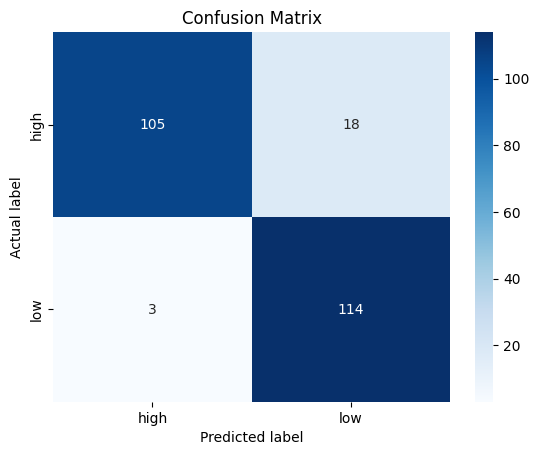

In [47]:
model = RandomForestClassifier(n_estimators=1000, random_state=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

cm_tree = confusion_matrix(y_test, y_pred)
categories = np.unique( data[['charges_categories']])
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

### 8) Unsupervised (kMeans)
- Cluster the data using a kMeans
      - Use the two most important features
- Visualize the results using a scatterplot, and a pairplot (use the clusters as `hue`)

In [48]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)

data['cluster_kmeans'] = kmeans.fit_predict(data[['age','charges']])

data.head()

c:\Users\migue\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\migue\AppData\Local\Temp\ipykernel_33672\4025692396.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster_kmeans'] = kmeans.fit_predict(data[['age','charges']])


,age,sex,bmi,children,smoker,region,charges,children_categories,sex_encoded,children_encoded,smoker_encoded,region_encoded,charges_categories,cluster_kmeans
0,19,female,27.900,0,yes,southwest,16884.92400,no_children,0,1,1,3,high,0
1,18,male,33.770,1,no,southeast,1725.55230,unique_children,1,2,0,2,low,1
2,28,male,33.000,3,no,southeast,4449.46200,2_or_more,1,0,0,2,low,1
3,33,male,22.705,0,no,northwest,21984.47061,no_children,1,1,0,1,high,0
4,32,male,28.880,0,no,northwest,3866.85520,no_children,1,1,0,1,low,1


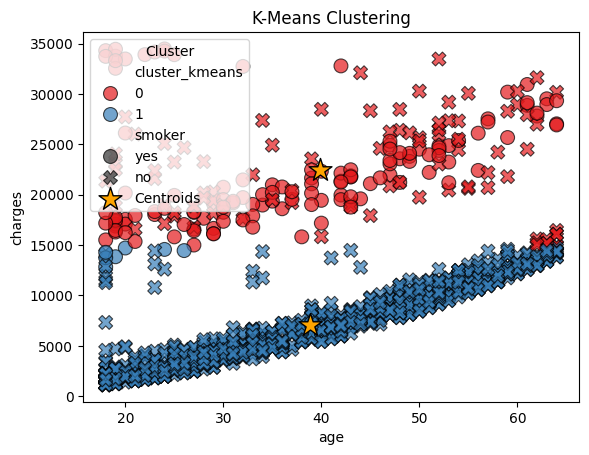

In [49]:
# Plot the clusters
sns.scatterplot(data=data, x='age', y='charges', style ='smoker', hue ='cluster_kmeans',palette='Set1', s=100, edgecolor='k', alpha = 0.7)

# Add centroids to the plot
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='orange',edgecolor='k', marker='*', label='Centroids')

# Add labels and show plot
plt.title('K-Means Clustering')
plt.legend(title='Cluster')
plt.show()

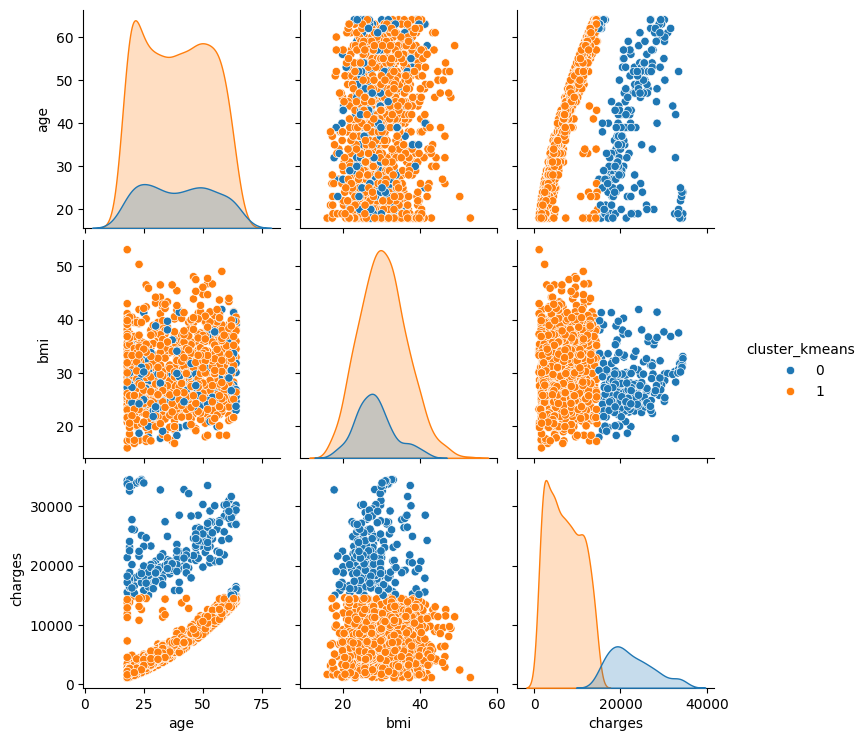

In [50]:
sns.pairplot(data, vars=['age', 'bmi', 'charges'], hue='cluster_kmeans',diag_kind='kde')